**Load the output of limma-voom using Pandas.**

In [35]:
import pandas as pd
data = pd.read_csv("top2.csv", sep=",")
data.head()

,genes,logFC,AveExpr,t,P.Value,adj.P.Val,B
0,ENSG00000147255,4.212719,5.036796,32.540700,1.016408e-07,0.001858,8.565757
1,ENSG00000151892,2.530967,5.702625,31.925158,1.133285e-07,0.001858,8.615937
2,ENSG00000213673,4.730086,-2.601906,31.415734,1.242076e-07,0.001858,5.558399
3,ENSG00000074527,-1.339166,7.366807,-31.233154,1.284020e-07,0.001858,8.644275
4,ENSG00000151224,5.105304,-2.408434,29.574816,1.752000e-07,0.001858,5.565237


In [36]:
deg = data = pd.read_csv("top2.csv", sep=",")
deg

,genes,logFC,AveExpr,t,P.Value,adj.P.Val,B
0,ENSG00000147255,4.212719,5.036796,32.540700,1.016408e-07,0.001858,8.565757
1,ENSG00000151892,2.530967,5.702625,31.925158,1.133285e-07,0.001858,8.615937
2,ENSG00000213673,4.730086,-2.601906,31.415734,1.242076e-07,0.001858,5.558399
3,ENSG00000074527,-1.339166,7.366807,-31.233154,1.284020e-07,0.001858,8.644275
4,ENSG00000151224,5.105304,-2.408434,29.574816,1.752000e-07,0.001858,5.565237
...,...,...,...,...,...,...,...
60670,ENSG00000160712,0.000042,3.868950,0.000553,9.995777e-01,0.999644,-7.423323
60671,ENSG00000249459,-0.000092,1.509919,-0.000448,9.996581e-01,0.999708,-7.087901
60672,ENSG00000011405,-0.000052,6.717332,-0.000186,9.998577e-01,0.999877,-7.698110
60673,ENSG00000180245,-0.000180,-4.057159,-0.000161,9.998769e-01,0.999877,-6.226297


**We would like to add gene names and descriptions to our DEG dataframe.**

You can use [BioMart](https://useast.ensembl.org/biomart/martview/) to prepare a file containing the correspondance between the Ensembl IDs and gene names.

In [37]:
mart = pd.read_table("/u/francoij/Untitled Folder/code_github/datasets/mart_export.txt")
mart

,Gene stable ID,Gene name,Gene description
0,ENSG00000210049,MT-TF,mitochondrially encoded tRNA-Phe (UUU/C) [Sour...
1,ENSG00000211459,MT-RNR1,mitochondrially encoded 12S rRNA [Source:HGNC ...
2,ENSG00000210077,MT-TV,mitochondrially encoded tRNA-Val (GUN) [Source...
3,ENSG00000210082,MT-RNR2,mitochondrially encoded 16S rRNA [Source:HGNC ...
4,ENSG00000209082,MT-TL1,mitochondrially encoded tRNA-Leu (UUA/G) 1 [So...
...,...,...,...
69294,ENSG00000162437,RAVER2,"ribonucleoprotein, PTB binding 2 [Source:HGNC ..."
69295,ENSG00000122432,SPATA1,spermatogenesis associated 1 [Source:HGNC Symb...
69296,ENSG00000284882,NaN,novel transcript
69297,ENSG00000289881,NaN,novel transcript


**Merge the two dataframes (left join) using the Ensembl IDs as the index.**

([DataFrame.join()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html) documentation)

In [38]:
degmart = deg.merge(mart, left_on="genes", right_on="Gene stable ID", how="left")
degmart

,genes,logFC,AveExpr,t,P.Value,adj.P.Val,B,Gene stable ID,Gene name,Gene description
0,ENSG00000147255,4.212719,5.036796,32.540700,1.016408e-07,0.001858,8.565757,ENSG00000147255,IGSF1,immunoglobulin superfamily member 1 [Source:HG...
1,ENSG00000151892,2.530967,5.702625,31.925158,1.133285e-07,0.001858,8.615937,ENSG00000151892,GFRA1,GDNF family receptor alpha 1 [Source:HGNC Symb...
2,ENSG00000213673,4.730086,-2.601906,31.415734,1.242076e-07,0.001858,5.558399,ENSG00000213673,SLC25A5P3,solute carrier family 25 member 5 pseudogene 3...
3,ENSG00000074527,-1.339166,7.366807,-31.233154,1.284020e-07,0.001858,8.644275,ENSG00000074527,NTN4,netrin 4 [Source:HGNC Symbol;Acc:HGNC:13658]
4,ENSG00000151224,5.105304,-2.408434,29.574816,1.752000e-07,0.001858,5.565237,ENSG00000151224,MAT1A,methionine adenosyltransferase 1A [Source:HGNC...
...,...,...,...,...,...,...,...,...,...,...
60670,ENSG00000160712,0.000042,3.868950,0.000553,9.995777e-01,0.999644,-7.423323,ENSG00000160712,IL6R,interleukin 6 receptor [Source:HGNC Symbol;Acc...
60671,ENSG00000249459,-0.000092,1.509919,-0.000448,9.996581e-01,0.999708,-7.087901,ENSG00000249459,ZNF286B,zinc finger protein 286B (pseudogene) [Source:...
60672,ENSG00000011405,-0.000052,6.717332,-0.000186,9.998577e-01,0.999877,-7.698110,ENSG00000011405,PIK3C2A,phosphatidylinositol-4-phosphate 3-kinase cata...
60673,ENSG00000180245,-0.000180,-4.057159,-0.000161,9.998769e-01,0.999877,-6.226297,ENSG00000180245,RRH,retinal pigment epithelium-derived rhodopsin h...


How many genes were not present in the BioMart file?

In [39]:
60675 - 60486

189

### 1) How many genes have a significant (< 0.05) adjusted P-value?

In [101]:
significant_pvalue = degmart[degmart["adj.P.Val"] < 0.05]
significant_pvalue

,genes,logFC,AveExpr,t,P.Value,adj.P.Val,B,Gene stable ID,Gene name,Gene description
0,ENSG00000147255,4.212719,5.036796,32.540700,1.016408e-07,0.001858,8.565757,ENSG00000147255,IGSF1,immunoglobulin superfamily member 1 [Source:HG...
1,ENSG00000151892,2.530967,5.702625,31.925158,1.133285e-07,0.001858,8.615937,ENSG00000151892,GFRA1,GDNF family receptor alpha 1 [Source:HGNC Symb...
2,ENSG00000213673,4.730086,-2.601906,31.415734,1.242076e-07,0.001858,5.558399,ENSG00000213673,SLC25A5P3,solute carrier family 25 member 5 pseudogene 3...
3,ENSG00000074527,-1.339166,7.366807,-31.233154,1.284020e-07,0.001858,8.644275,ENSG00000074527,NTN4,netrin 4 [Source:HGNC Symbol;Acc:HGNC:13658]
4,ENSG00000151224,5.105304,-2.408434,29.574816,1.752000e-07,0.001858,5.565237,ENSG00000151224,MAT1A,methionine adenosyltransferase 1A [Source:HGNC...
...,...,...,...,...,...,...,...,...,...,...
1675,ENSG00000255306,0.552371,0.067305,5.782781,1.374697e-03,0.049767,-0.573276,ENSG00000255306,NaN,novel transcript
1676,ENSG00000130816,0.601536,8.122927,5.779767,1.378282e-03,0.049845,-1.391775,ENSG00000130816,DNMT1,DNA methyltransferase 1 [Source:HGNC Symbol;Ac...
1677,ENSG00000117036,-0.657280,5.838330,-5.779586,1.378496e-03,0.049845,-1.198532,ENSG00000117036,ETV3,ETS variant transcription factor 3 [Source:HGN...
1678,ENSG00000170264,0.793181,3.171832,5.777580,1.380888e-03,0.049875,-0.956460,ENSG00000170264,FAM161A,FAM161 centrosomal protein A [Source:HGNC Symb...


In [48]:
len(n_arr)

100000

### 2) Show a histogram of their log-fold-change.

(histplot, bins=)

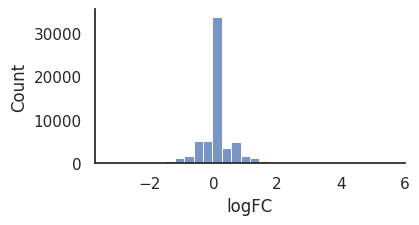

In [89]:
import seaborn as sns
sns.set(rc={'figure.figsize':(4, 2)})
sns.set_theme(context="notebook", style="white")
p= sns.histplot(degmart, x="logFC", bins=30) 
sns.despine()

### 3) How many genes are significant, with a fold-change greater than 2? Keep both over- and under-expressed genes in the treated samples. Show an histogram of their log-fold-change.

(abs, &)

In [93]:
degmart[(abs(degmart["logFC"]) > 2) & (degmart["adj.P.Val"] < 0.05)]
print("327 genes are significant, with a fold-change greater than 2.")
significant_genes_fc = degmart[(abs(degmart["logFC"]) > 2) & (degmart["adj.P.Val"] < 0.05)]
significant_genes_fc


327 genes are significant, with a fold-change greater than 2.


,genes,logFC,AveExpr,t,P.Value,adj.P.Val,B,Gene stable ID,Gene name,Gene description
0,ENSG00000147255,4.212719,5.036796,32.540700,1.016408e-07,0.001858,8.565757,ENSG00000147255,IGSF1,immunoglobulin superfamily member 1 [Source:HG...
1,ENSG00000151892,2.530967,5.702625,31.925158,1.133285e-07,0.001858,8.615937,ENSG00000151892,GFRA1,GDNF family receptor alpha 1 [Source:HGNC Symb...
2,ENSG00000213673,4.730086,-2.601906,31.415734,1.242076e-07,0.001858,5.558399,ENSG00000213673,SLC25A5P3,solute carrier family 25 member 5 pseudogene 3...
4,ENSG00000151224,5.105304,-2.408434,29.574816,1.752000e-07,0.001858,5.565237,ENSG00000151224,MAT1A,methionine adenosyltransferase 1A [Source:HGNC...
5,ENSG00000233476,3.076129,1.454574,29.328500,1.837454e-07,0.001858,7.167099,ENSG00000233476,EEF1A1P6,eukaryotic translation elongation factor 1 alp...
...,...,...,...,...,...,...,...,...,...,...
1651,ENSG00000256968,3.248474,-2.786747,5.832535,1.317054e-03,0.048373,-0.385149,ENSG00000256968,SNRPEP2,SNRPE pseudogene 2 [Source:HGNC Symbol;Acc:HGN...
1658,ENSG00000125337,-2.116797,-3.792998,-5.817777,1.333857e-03,0.048732,-0.402063,ENSG00000125337,KIF25,kinesin family member 25 [Source:HGNC Symbol;A...
1664,ENSG00000225267,2.463272,-3.712094,5.810498,1.342235e-03,0.048913,-0.405239,ENSG00000225267,RPL8P2,ribosomal protein L8 pseudogene 2 [Source:HGNC...
1668,ENSG00000250221,2.459211,-1.111283,5.801953,1.352148e-03,0.049156,-0.423541,ENSG00000250221,KRT8P32,keratin 8 pseudogene 32 [Source:HGNC Symbol;Ac...


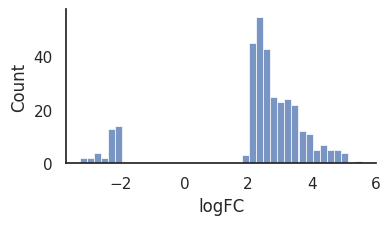

In [90]:
sns.set(rc={'figure.figsize':(4, 2)})
sns.set_theme(context="notebook", style="white")
sns.histplot(significant_genes_fc, x="logFC", bins=40)
sns.despine()

### 4) Show a Volcano plot with all genes. Show the genes selected in Q.3 in a different color.

(numpy.log10, hue=, linewidth=)

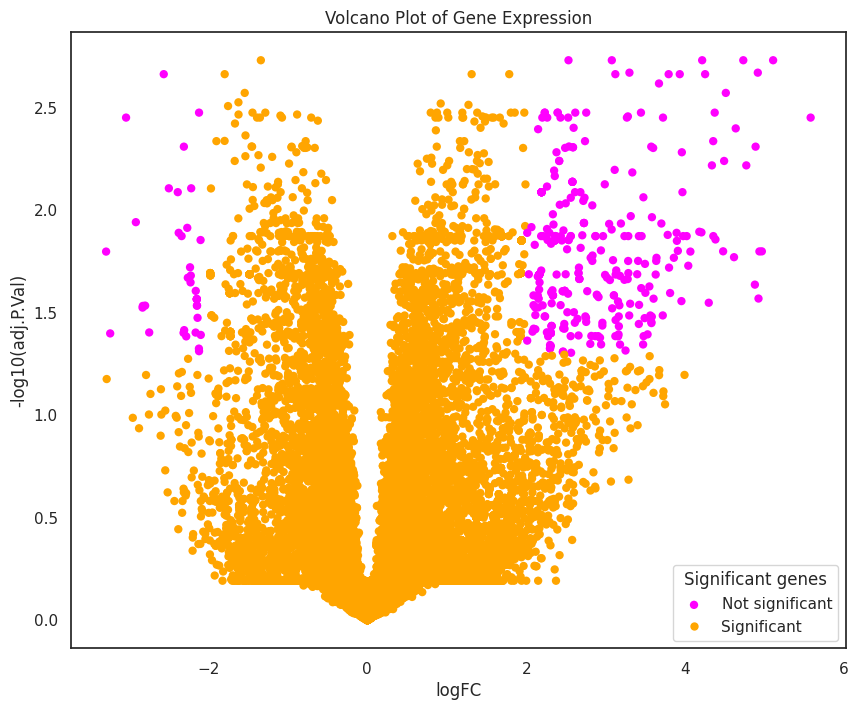

In [153]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

degmart["-log10(adj.P.Val)"] = -np.log10(degmart["adj.P.Val"])
degmart["significant"] = (abs(degmart["logFC"]) > 2) & (degmart["adj.P.Val"] < 0.05)

sns.set(rc={'figure.figsize':(10, 8)})
sns.set_theme(context="notebook", style="white")
sns.scatterplot(data=degmart, x="logFC", y="-log10(adj.P.Val)", hue="significant",
                palette={False: 'orange', True: 'magenta'}, linewidth=0)
plt.title('Volcano Plot of Gene Expression')
plt.legend(title='Significant genes', loc='lower right', labels=['Not significant', 'Significant'])
plt.show()
